## Pre-processing

In [81]:
import pandas as pd
data_set = pd.read_csv(r'C:\Users\hp\Saclay-ai\ML\Crop_data.csv')

In [82]:
data_set.dtypes

N                           int64
P                           int64
K                           int64
temperature               float64
humidity                  float64
ph                        float64
rainfall                  float64
label                      object
soil_moisture             float64
soil_type                   int64
sunlight_exposure         float64
wind_speed                float64
co2_concentration         float64
organic_matter            float64
irrigation_frequency        int64
crop_density              float64
pest_pressure             float64
fertilizer_usage          float64
growth_stage                int64
urban_area_proximity      float64
water_source_type           int64
frost_risk                float64
water_usage_efficiency    float64
dtype: object

In [182]:
data_set.isnull().values.any()

False

In [83]:
data_set["label"].nunique()

22

In [84]:
from sklearn.preprocessing import LabelEncoder
X, y = data_set.drop(columns=["label"]), data_set["label"]

le = LabelEncoder()
y = le.fit_transform(y)
y

array([20, 20, 20, ...,  5,  5,  5])

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
from scipy.stats import spearmanr

results = []
for col in X.columns:
    cor, p = spearmanr(data_set[col], y)
    result = {'Feature': col,'Spearman Correlation': cor,'p-value': p,'Accepted (p > 0.005)': p > 0.005}
    results.append(result)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Spearman Correlation', key=abs, ascending=False)

results_df

,Feature,Spearman Correlation,p-value,Accepted (p > 0.005)
1,P,-0.472171,1.452208e-122,False
4,humidity,0.181885,8.101993e-18,False
2,K,-0.148028,3.001960e-12,False
3,temperature,0.100340,2.410323e-06,False
11,co2_concentration,0.061906,3.674792e-03,False
6,rainfall,-0.059979,4.890011e-03,False
5,ph,0.047107,2.713946e-02,True
0,N,-0.041745,5.025720e-02,True
20,frost_risk,-0.031035,1.456218e-01,True
12,organic_matter,-0.027966,1.897794e-01,True


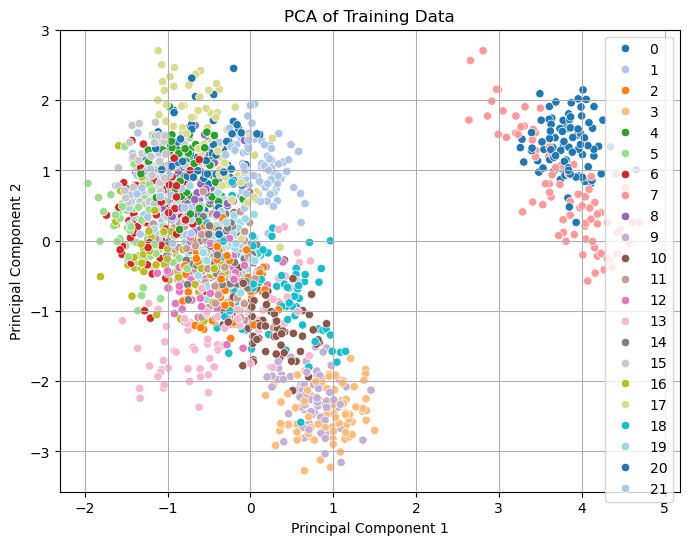

In [190]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

# Scatter plot with colors based on class labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x_pca[:, 0], 
    y=x_pca[:, 1], 
    hue=y_train, 
    palette='tab20',  # up to 20 distinct colors
    legend="full"
)
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Supervised learning

#### Softmax Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings; warnings.filterwarnings("ignore")

log_res = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) #lbfgs is a quasi-Newton method
log_res.fit(x_train, y_train)
log_res_result  = log_res.predict(x_test) 

accuracy_score(y_test, log_res_result)

0.9409090909090909

#### GDA

In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

gda = QuadraticDiscriminantAnalysis()
gda.fit(x_train, y_train)
gda_result = gda.predict(x_test)

accuracy_score(y_test, gda_result)

0.9818181818181818

#### SVMs

In [128]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(x_train, y_train)
svm_result = svm_linear.predict(x_test)

accuracy_score(y_test, svm_result)

0.9545454545454546

In [170]:
svm_poly = SVC(kernel="poly", degree=1, coef0=8, C=5)
svm_poly.fit(x_train, y_train)
svm_poly_result = svm_poly.predict(x_test)

accuracy_score(y_test, svm_poly_result)

0.9727272727272728

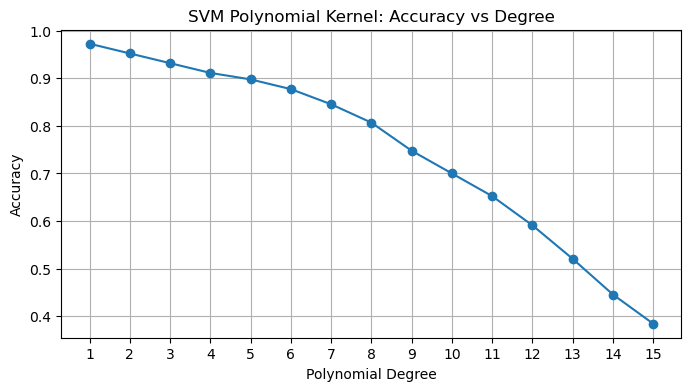

In [172]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = []
degrees = range(1, 16)

for d in degrees:
    svm_poly = SVC(kernel="poly", degree=d, coef0=1, C=5)
    svm_poly.fit(x_train, y_train)
    y_pred = svm_poly.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(degrees, accuracies, marker='o')
plt.title("SVM Polynomial Kernel: Accuracy vs Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.xticks(degrees)
plt.grid(True)
plt.show()


In [181]:
svm_rbf = SVC(kernel="rbf", gamma=0.01, C=30)
svm_rbf.fit(x_train, y_train)
svm_rbf_result = svm_rbf.predict(x_test)

accuracy_score(y_test, svm_rbf_result)

0.9681818181818181

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10,30, 35, 40, 50, 60],
    'gamma': [0.01, 0.1, 1, 'scale']
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.best_estimator_.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'C': 30, 'gamma': 0.01}
Best CV score: 0.9607954545454545
Test accuracy: 0.9681818181818181


#### Naive Bayes

In [89]:
#TODO

#### Neural Networks

In [90]:
#TODO

## Unsepervised learning

#### k-means

In [91]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import silhouette_score

num_classes = len(np.unique(y_train))

# Step 1: Compute class-wise means
class_means = []
for label in range(num_classes):
    class_mean = x_train[y_train == label].mean(axis=0)
    class_means.append(class_mean)

# Step 2: Convert to numpy array for use in KMeans init
good_init = np.array(class_means)

# Step 3: Create and fit KMeans using custom initialization
kmeans = KMeans(n_clusters=num_classes, init=good_init, n_init=1, random_state=42)
kmeans.fit(x_train)
cluster_labels = kmeans.predict(x_test)

print(kmeans.inertia_)
print(silhouette_score(x_train, kmeans.labels_))

mapped_preds = np.zeros_like(cluster_labels)
for i in range(num_classes):
    mask = (cluster_labels == i)
    if np.any(mask):
        mapped_preds[mask] = mode(y_test[mask])[0]

accuracy_score(y_test, mapped_preds)

26745.75406597634
0.04937745628884256


0.44772727272727275

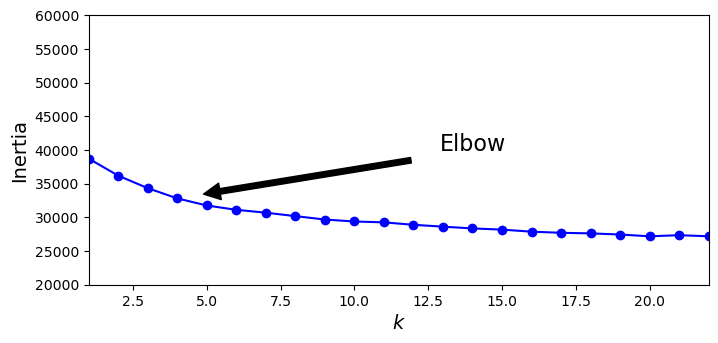

In [92]:
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_train) for k in range(1, 25)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 25), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 22, 20000, 60000])
plt.show()

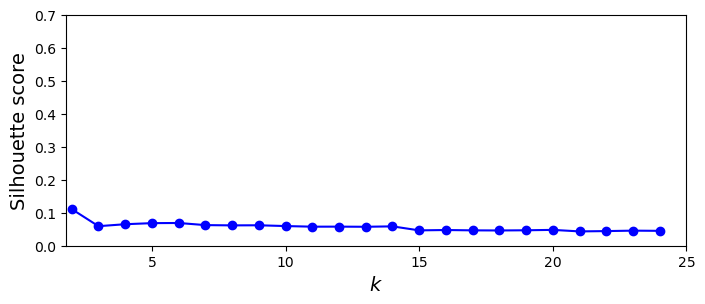

In [93]:
silhouette_scores = [silhouette_score(x_train, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 25), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 25, 0.0, 0.7])
plt.show()

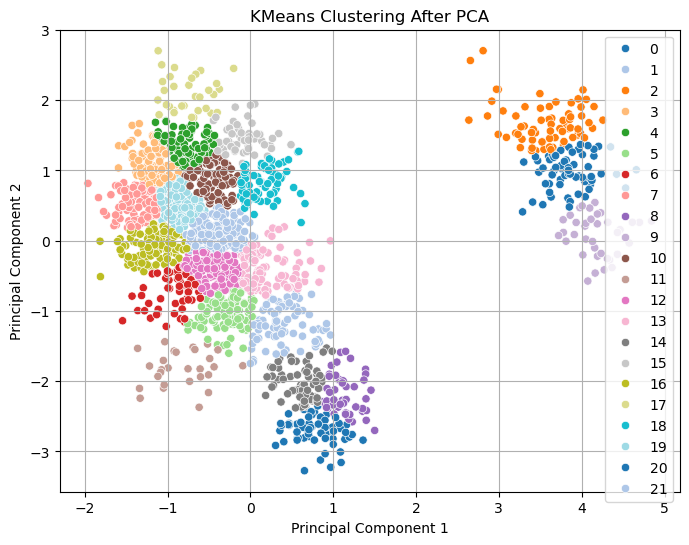

In [ ]:
kmeans = KMeans(n_clusters=22, random_state=42)
kmeans_labels = kmeans.fit_predict(x_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x_pca[:, 0], y=x_pca[:, 1],
    hue=kmeans_labels,
    palette='tab20',  # Up to 20 different colors
    legend='full'
)
plt.title("KMeans Clustering After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#### DBSCAN

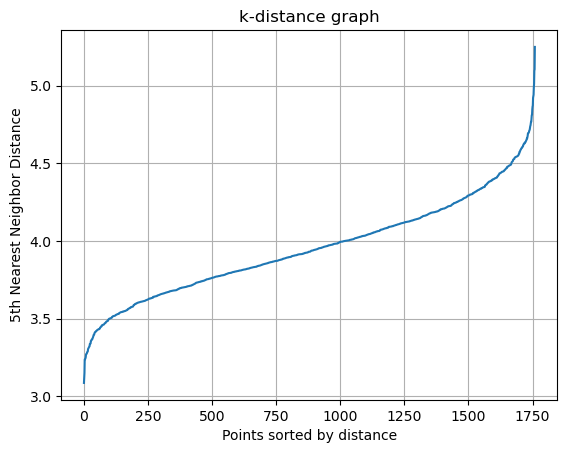

In [72]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x_train)
distances, indices = nbrs.kneighbors(x_train)

# Sort distances of 5th nearest neighbor
k_distances = np.sort(distances[:, 4])
plt.plot(k_distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [95]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.544, min_samples=5)
dbscan.fit(x_train)

np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21], dtype=int64)

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

print(normalized_mutual_info_score(y_train, dbscan.labels_))
print(adjusted_rand_score(y_train, dbscan.labels_))                      # very bad clustering ??

0.12047335621091385
0.007764828883583478


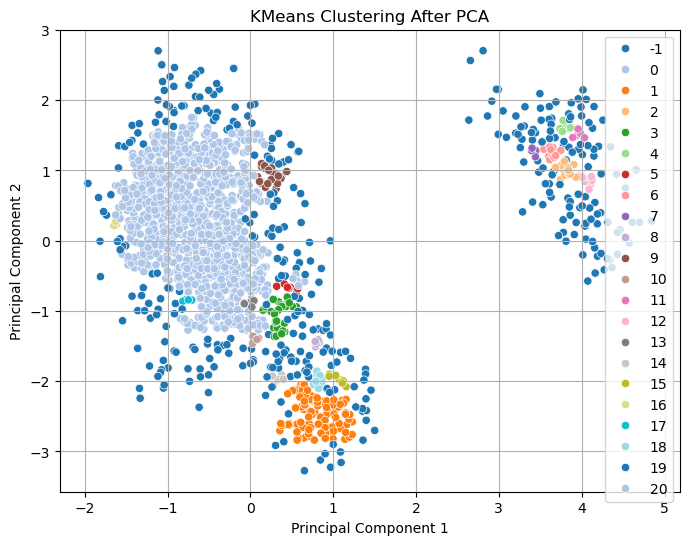

In [199]:
db = DBSCAN(eps=0.1, min_samples=5)
dbs_labels = db.fit_predict(x_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x_pca[:, 0], y=x_pca[:, 1],
    hue=dbs_labels,
    palette='tab20',  # Up to 20 different colors
    legend='full'
)
plt.title("KMeans Clustering After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#### Spectral clustering

In [102]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=22, gamma=100, affinity='rbf', random_state=42)
spec.fit(x_train)

np.percentile(spec.affinity_matrix_, 95)

0.0

In [103]:
adjusted_rand_score(y_train, spec.labels_)

0.0

#### Mixture Gaussian & EM

In [104]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=22, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=22, n_init=10, random_state=42)

In [105]:
gm.converged_

True

In [107]:
gm.n_iter_

64

In [106]:
gm.means_

array([[ 21.94893504,  47.8122954 ,  22.17878062,  29.02983164,
         54.22560715,   6.40338827,  60.71241354,  19.62259073,
          1.78404153,   8.35301474,   8.12930637, 410.14057916,
          6.35955691,   3.92835024,  12.84523584,  48.24083569,
        123.63618546,   2.28347219,  18.08452264,   1.8548607 ,
         29.66591727,   3.06052453],
       [ 21.65935188,  25.83016955,  26.4628005 ,  26.26279139,
         76.66922352,   6.18964732, 107.9833041 ,  20.24828025,
          2.17895446,   8.35351305,   9.93853392, 427.88496736,
          4.7351277 ,   3.34175797,  12.18679576,  57.174818  ,
        158.77449442,   2.08134758,  26.64123876,   2.22126685,
         53.39629766,   2.61564198],
       [ 21.78177614, 134.25978686, 200.32050835,  22.7403998 ,
         87.05713891,   5.96336585,  90.22650233,  20.37732565,
          1.96574386,   8.83343298,   9.32123107, 397.88468968,
          5.27441278,   3.7720651 ,  12.17115472,  48.3751599 ,
         85.72674001,   2.0111

In [110]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 30)]

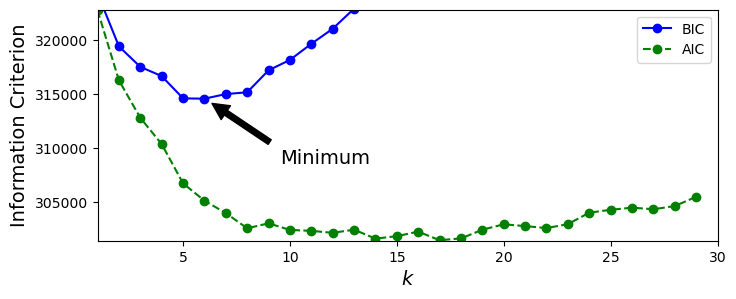

In [124]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), bics, "bo-", label="BIC")
plt.plot(range(1, 30), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 30, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(6, bics[4]),
             xytext=(0.35, 0.45),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

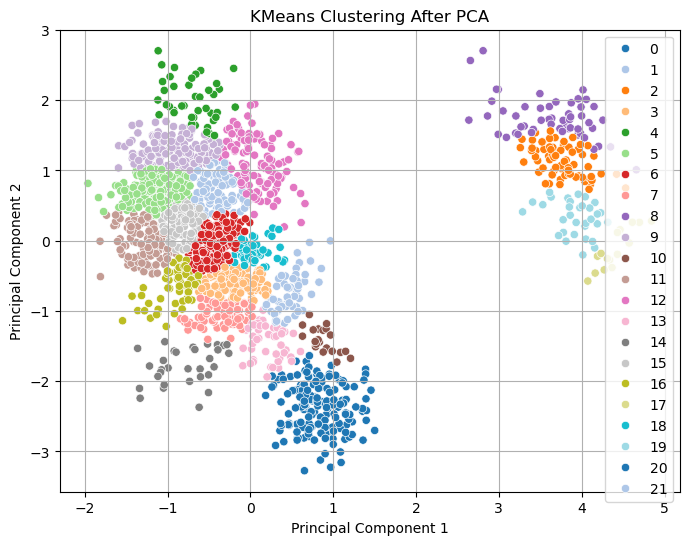

In [202]:
gg = GaussianMixture(n_components=22, n_init=10, random_state=42)
gg_labels = gg.fit_predict(x_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x_pca[:, 0], y=x_pca[:, 1],
    hue=gg_labels,
    palette='tab20',  # Up to 20 different colors
    legend='full'
)
plt.title("KMeans Clustering After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()